In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
import matplotlib.dates as mdates
import numpy as np

In [2]:
ds = xr.open_zarr("data_fig4.zarr/");

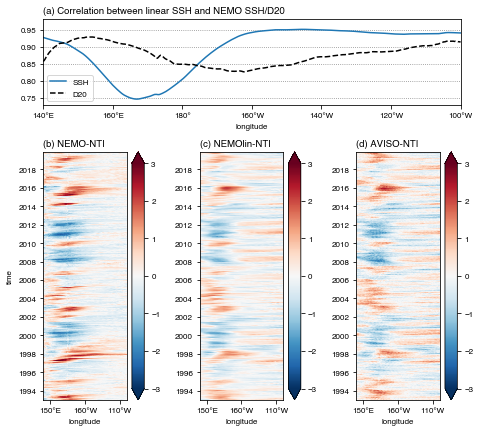

In [3]:
width = 190*0.0393700787
fig = plt.figure(figsize=(width,7))
plt.rcParams['font.size'] = 8
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

ax1 = plt.subplot2grid((4, 3), (0, 0), colspan=3)
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ds.corr_ssha_sshlia.plot(
    label='SSH'
)
ds.corr_d20a_sshlia.plot(label='D20',color='black', linestyle='--')
plt.ylim(0.73,0.98)
plt.ylabel('')
plt.xlim(140,260)
plt.grid(color='grey',linestyle = ':',axis='y')
plt.title('(a) Correlation between linear SSH and NEMO SSH/D20',loc='left')
plt.title('')
plt.xlabel('longitude');
plt.legend()


ax2 = plt.subplot2grid((3, 3), (1, 0), rowspan=2)
ax2.xaxis.set_major_formatter(LongitudeFormatter())
year =  mdates.YearLocator(2,month=1) 
ax2.yaxis.set_major_locator(year)   
ax2.yaxis.set_major_formatter(mdates.DateFormatter('%Y')) # %Y-%m
ds.nti_nemo.plot(
    y="time", 
    vmin=-3, vmax=3,
    cmap=plt.cm.RdBu_r, extend="both",
    cbar_kwargs={'label': ''},
    rasterized=True
) 
plt.title("(b) NEMO-NTI",loc='left');
plt.title('')
plt.ylabel("time");
plt.xlabel('longitude');

ax3 = plt.subplot2grid((3, 3), (1, 1), rowspan=2)
ax3.xaxis.set_major_formatter(LongitudeFormatter())
ax3.yaxis.set_major_locator(year)   
ax3.yaxis.set_major_formatter(mdates.DateFormatter('%Y')) # %Y-%m
ds.nti_nemolin.plot(
    y="time",
    vmin=-3, vmax=3,
    cmap=plt.cm.RdBu_r, extend="both",
    cbar_kwargs={'label': ''},
    rasterized=True
) 
plt.title("(c) NEMOlin-NTI",loc='left');
plt.title('')
plt.ylabel("");
plt.xlabel('longitude');

ax4 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax4.xaxis.set_major_formatter(LongitudeFormatter())
ax4.yaxis.set_major_locator(year)   
ax4.yaxis.set_major_formatter(mdates.DateFormatter('%Y')) # %Y-%m
ds.nti_aviso.plot(
    y="time",
    vmin=-3, vmax=3,
    cmap=plt.cm.RdBu_r, extend="both",
    cbar_kwargs={'label': ''},
    rasterized=True
)
plt.title("(d) AVISO-NTI",loc='left');
plt.title('')
plt.ylabel("");
plt.xlabel('longitude');

plt.subplots_adjust(wspace =0.5, hspace = 0.15)

plt.savefig("fig4.pdf", format="pdf", bbox_inches="tight")
plt.show()